---
**Chapter 5: Introduction to Computer Theory by Daniel I. A. Cohen**

In [1]:
import re
from graphviz import Digraph
from itertools import product
from pprint import pformat, pprint
from IPython.display import display, Latex, Markdown
FA = dict()

In [2]:
def display_dfa(fa):
    dot = Digraph()
    dot.attr(rankdir='LR')
    dot.attr(bgcolor='black')
    dot.attr('node', style='filled', fillcolor='black', fontcolor='white', color='white')
    dot.attr('edge', color='white', fontcolor='white')
    Σ = fa[0][1:]
    Δ = fa[1:]
    for i, δ in enumerate(Δ):
        q = δ[0]
        is_start = False
        is_finish = False
        if m := re.match(r"^\-(.*)$", q): is_start = True;  q = m.groups(1)[0]
        if m := re.match(r"^\+(.*)$", q): is_finish = True; q = m.groups(1)[0]
        if is_finish: dot.node(str(i+1), shape='doublecircle')
        else:         dot.node(str(i+1), shape='circle')
        if is_start:
            dot.node('', width='0', height='0', margin='0', shape='point', style='invis')
            dot.edge('', str(i+1), )
    for i, δ in enumerate(Δ):
        for j in range(1, 3):
            dot.edge(str(i+1), str(δ[j]), label=Σ[j-1])
    dot.render('dfa', format='png', cleanup=False)  # Saves as dfa.png
    display(dot)

In [3]:
def compile_fa(fa_table):
    header = fa_table[0][1:]
    states = fa_table[1:]
    start_state = None
    accepting_states = set()
    transitions = {}
    for row in states:
        state_label = row[0]
        state_num = int(state_label.lstrip('+-'))
        if state_label.startswith('-'):
            start_state = state_num
        if state_label.startswith('+') or state_label.startswith('-+'):
            accepting_states.add(state_num)
        transitions[state_num] = {}
        for symbol, next_state in zip(header, row[1:]):
            transitions[state_num][symbol] = next_state
    if start_state is None:
        raise ValueError("No start state defined in FA table.")
    return start_state, header, transitions, accepting_states

In [4]:
def run_fsm(input_str, start_state, header, transitions, accepting_states):
    current_state = start_state
    for ch in input_str:
        if ch not in header:
            raise ValueError(f"Invalid input symbol: {ch}")
        current_state = transitions[current_state][ch]
    accepted = current_state in accepting_states
    return accepted, current_state

In [5]:
def show_samples(table):
    parts = []
    alphabet = table[0][1:]
    fsm = compile_fa(table)
    for length in range(0, 8):
        for combo in product(alphabet, repeat=length):
            word = ''.join(combo)
            accepted, _ = run_fsm(word, *fsm)
            if accepted:
                parts.append(word)
            else: parts.append(f"**{word}**")
    results = ' '.join(parts)
    return results

In [6]:
def display_problem(problem_name):
    problem = FA[problem_name]
    display(Latex(problem[0]))
    display_dfa(problem[1])
    display(Markdown(show_samples(problem[1])))

---
**Problem 1:** Write out the transition tables for the FAs on pp. 56, 58 (both), 63, 64, and 69 that were defined by pictures.

**Answer 1:**



<IPython.core.display.Latex object>

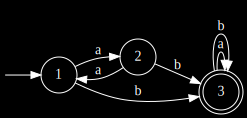

**** **a** b **aa** ab ba bb **aaa** aab aba abb baa bab bba bbb **aaaa** aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb **aaaaa** aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb **aaaaaa** aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb **aaaaaaa** aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [7]:
#-------------------------------------------------------------------------------
FA['pg_56'] = (\
  "$(a+b)^{*}b(a+b)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  3]
  , [  '2',  1 ,  3]
  , [ '+3',  3 ,  3]
  ])
#-------------------------------------------------------------------------------
display_problem('pg_56')

<IPython.core.display.Latex object>

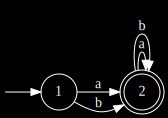

**** a b aa ab ba bb aaa aab aba abb baa bab bba bbb aaaa aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [8]:
#-------------------------------------------------------------------------------
FA['pg_58_1'] = (\
  "$(a+b)(a+b)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  2 ]
  , [ '+2',  2 ,  2 ]
  ])
#-------------------------------------------------------------------------------
display_problem('pg_58_1')

<IPython.core.display.Latex object>

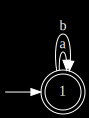

 a b aa ab ba bb aaa aab aba abb baa bab bba bbb aaaa aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [9]:
#-------------------------------------------------------------------------------
FA['pg_58_2'] = (\
  "$(a+b_^{*}$"
, [ [  ' ', 'a', 'b']
  , ['-+1',  1 ,  1 ]
  ])
#-------------------------------------------------------------------------------
display_problem('pg_58_2')

<IPython.core.display.Latex object>

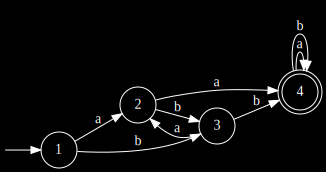

**** **a** **b** aa **ab** **ba** bb aaa aab **aba** abb baa **bab** bba bbb aaaa aaab aaba aabb abaa **abab** abba abbb baaa baab **baba** babb bbaa bbab bbba bbbb aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab **ababa** ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa **babab** babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa **ababab** ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab **bababa** bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab **abababa** abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa **bababab** bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [10]:
#-------------------------------------------------------------------------------
FA['pg_63'] = (\
  "$(a+b)^{*}(aa+bb)(a+b)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  3 ]
  , [  '2',  4 ,  3 ]
  , [  '3',  2 ,  4 ]
  , [ '+4',  4 ,  4 ]
  ])
#-------------------------------------------------------------------------------
display_problem('pg_63')

<IPython.core.display.Latex object>

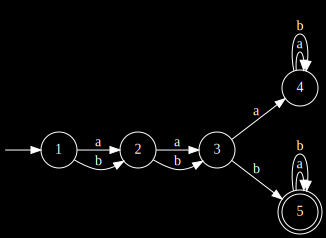

**** **a** **b** **aa** **ab** **ba** **bb** **aaa** aab **aba** abb **baa** bab **bba** bbb **aaaa** **aaab** aaba aabb **abaa** **abab** abba abbb **baaa** **baab** baba babb **bbaa** **bbab** bbba bbbb **aaaaa** **aaaab** **aaaba** **aaabb** aabaa aabab aabba aabbb **abaaa** **abaab** **ababa** **ababb** abbaa abbab abbba abbbb **baaaa** **baaab** **baaba** **baabb** babaa babab babba babbb **bbaaa** **bbaab** **bbaba** **bbabb** bbbaa bbbab bbbba bbbbb **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** babaaa babaab bababa bababb babbaa babbab babbba babbbb **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [11]:
#-------------------------------------------------------------------------------
FA['pg_64'] = (\
  "$(a+b)(a+b)b(a+b)*$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  2 ]
  , [  '2',  3 ,  3 ]
  , [  '3',  4 ,  5 ]
  , [  '4',  4 ,  4 ]
  , [ '+5',  5 ,  5 ]
  ])
#-------------------------------------------------------------------------------
display_problem('pg_64')

<IPython.core.display.Latex object>

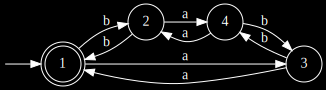

 **a** **b** aa **ab** **ba** bb **aaa** **aab** **aba** **abb** **baa** **bab** **bba** **bbb** aaaa **aaab** **aaba** aabb **abaa** abab abba **abbb** **baaa** baab baba **babb** bbaa **bbab** **bbba** bbbb **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** aaaaaa **aaaaab** **aaaaba** aaaabb **aaabaa** aaabab aaabba **aaabbb** **aabaaa** aabaab aababa **aababb** aabbaa **aabbab** **aabbba** aabbbb **abaaaa** abaaab abaaba **abaabb** ababaa **ababab** **ababba** ababbb abbaaa **abbaab** **abbaba** abbabb **abbbaa** abbbab abbbba **abbbbb** **baaaaa** baaaab baaaba **baaabb** baabaa **baabab** **baabba** baabbb babaaa **babaab** **bababa** bababb **babbaa** babbab babbba **babbbb** bbaaaa **bbaaab** **bbaaba** bbaabb **bbabaa** bbabab bbabba **bbabbb** **bbbaaa** bbbaab bbbaba **bbbabb** bbbbaa **bbbbab** **bbbbba** bbbbbb **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [12]:
# pg_69
FA['EVEN_EVEN'] = (\
  "$(aa+bb+(ab+ba)(aa+bb)^{*}(ab+ba))^{*}$"
, [ [  ' ', 'a', 'b']
  , ['-+1',  3 ,  2 ]
  , [  '2',  4 ,  1 ]
  , [  '3',  1 ,  4 ]
  , [  '4',  2 ,  3 ]
  ])
#-------------------------------------------------------------------------------
display_problem('EVEN_EVEN')

---
**Problem 2:** Build an FA that accepts only the language of all words with b as the second letter. Show both the picture and the transition table for this machine and find a regular expression for the language.

**Answer 2:**

RE = $(a + b)b(a+b)^{*}$

<IPython.core.display.Latex object>

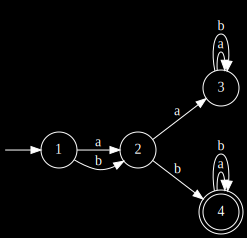

**** **a** **b** **aa** ab **ba** bb **aaa** **aab** aba abb **baa** **bab** bba bbb **aaaa** **aaab** **aaba** **aabb** abaa abab abba abbb **baaa** **baab** **baba** **babb** bbaa bbab bbba bbbb **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** abaaa abaab ababa ababb abbaa abbab abbba abbbb **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [13]:
#-------------------------------------------------------------------------------
FA['prob5_2'] = (\
  "$(a+b)b(a+b)^{*}$"
, [ [  ' ','a', 'b']
  , [ '-1', 2 ,  2 ]
  , [  '2', 3 ,  4 ]
  , [  '3', 3 ,  3 ]
  , [ '+4', 4 ,  4 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_2')

---
**Problem 3:** Build an FA that accepts only the words baa, ab, and abb and no other strings longer or shorter.

**Answer 3:**

RE = $(ab(Λ + b)+baa)$

<IPython.core.display.Latex object>

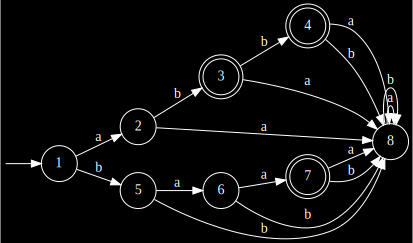

**** **a** **b** **aa** ab **ba** **bb** **aaa** **aab** **aba** abb baa **bab** **bba** **bbb** **aaaa** **aaab** **aaba** **aabb** **abaa** **abab** **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** **bbbb** **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** **bbbbbb** **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [14]:
#-------------------------------------------------------------------------------
FA['prob5_3'] = (\
  "$(ab(Λ + b)+baa)$"
, [ [  ' ','a', 'b']
  , [ '-1', 2 ,  5 ]
  , [  '2', 8 ,  3 ]
  , [ '+3', 8 ,  4 ]
  , [ '+4', 8 ,  8 ]
  , [  '5', 6 ,  8 ]
  , [  '6', 7 ,  8 ]
  , [ '+7', 8 ,  8 ]
  , [  '8', 8 ,  8 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_3')

---
**Problem 4:**
* (i) Build an FA with the three states that accepts all strings.
* (ii) Show that given any FA with three states and three *+*'s, it accepts all input strings.
* (iii) If an FA has three states and only one *+*, must it reject some inputs?

**Answer 4:**
- *See below*
- follows from the pigeon-hole principle
- No.

<IPython.core.display.Latex object>

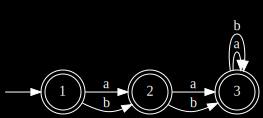

 a b aa ab ba bb aaa aab aba abb baa bab bba bbb aaaa aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [15]:
FA['prob5_4'] = (\
  "$(a+b)(a+b)(a+b)^{*}$"
, [ [ ' ' , 'a', 'b']
  , ['-+1',  2 ,  2 ]
  , [ '+2',  3 ,  3 ]
  , [ '+3',  3 ,  3 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_4')

---
**Problem 5:**
* (i) Build an FA that accepts only those words that have more that four letters.
* (ii) Build an FA that accepts only those words that have fewer than four letters.
* (iii) Build an FA that accepts only those words with exactly four letters.

**Answer 5:**
- RE: $\quad (a+b)^{5}(a+b)^{*}$
- RE: $\quad Λ+a+b+(Λ+a+b+(Λ+a+b)), \quad (Λ+a+b)^3$
- RE: $\quad (a+b)(a+b)(a+b)(a+b), \quad (a+b)^4$

<IPython.core.display.Latex object>

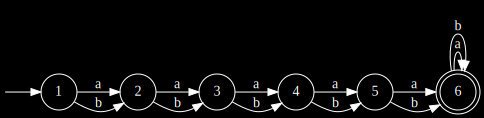

**** **a** **b** **aa** **ab** **ba** **bb** **aaa** **aab** **aba** **abb** **baa** **bab** **bba** **bbb** **aaaa** **aaab** **aaba** **aabb** **abaa** **abab** **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** **bbbb** aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [16]:
FA['prob5_5_1'] = (\
  "$(a+b)(a+b)(a+b)(a+b)(a+b)(a+b)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  2 ]
  , [  '2',  3 ,  3 ]
  , [  '3',  4 ,  4 ]
  , [  '4',  5 ,  5 ]
  , [  '5',  6 ,  6 ]
  , [ '+6',  6 ,  6 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_5_1')

<IPython.core.display.Latex object>

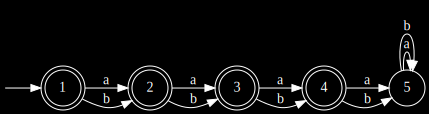

 a b aa ab ba bb aaa aab aba abb baa bab bba bbb **aaaa** **aaab** **aaba** **aabb** **abaa** **abab** **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** **bbbb** **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** **bbbbbb** **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [17]:
FA['prob5_5_2'] = (\
  "$(Λ+a+b)(Λ+a+b)(Λ+a+b)$"
, [ [  ' ', 'a', 'b']
  , ['-+1',  2 ,  2 ]
  , [ '+2',  3 ,  3 ]
  , [ '+3',  4 ,  4 ]
  , [ '+4',  5 ,  5 ]
  , [  '5',  5 ,  5 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_5_2')

<IPython.core.display.Latex object>

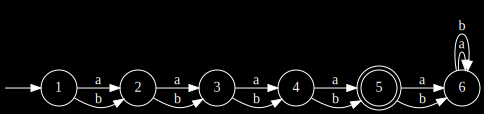

**** **a** **b** **aa** **ab** **ba** **bb** **aaa** **aab** **aba** **abb** **baa** **bab** **bba** **bbb** aaaa aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** **bbbbbb** **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [18]:
FA['prob5_5_3'] = (\
  "$(a+b)(a+b)(a+b)(a+b)$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  2 ]
  , [  '2',  3 ,  3 ]
  , [  '3',  4 ,  4 ]
  , [  '4',  5 ,  5 ]
  , [ '+5',  6 ,  6 ]
  , [  '6',  6 ,  6 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_5_3')

---
**Problem 6:** Build an FA that accepts only those words that do *not* end with *ba*.

**Answer 6:**
RE: $Λ+a+(a+b)^{*}(b+aa)$

<IPython.core.display.Latex object>

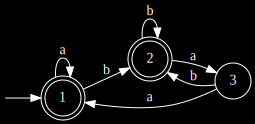

 a b aa ab **ba** bb aaa aab **aba** abb baa bab **bba** bbb aaaa aaab **aaba** aabb abaa abab **abba** abbb baaa baab **baba** babb bbaa bbab **bbba** bbbb aaaaa aaaab **aaaba** aaabb aabaa aabab **aabba** aabbb abaaa abaab **ababa** ababb abbaa abbab **abbba** abbbb baaaa baaab **baaba** baabb babaa babab **babba** babbb bbaaa bbaab **bbaba** bbabb bbbaa bbbab **bbbba** bbbbb aaaaaa aaaaab **aaaaba** aaaabb aaabaa aaabab **aaabba** aaabbb aabaaa aabaab **aababa** aababb aabbaa aabbab **aabbba** aabbbb abaaaa abaaab **abaaba** abaabb ababaa ababab **ababba** ababbb abbaaa abbaab **abbaba** abbabb abbbaa abbbab **abbbba** abbbbb baaaaa baaaab **baaaba** baaabb baabaa baabab **baabba** baabbb babaaa babaab **bababa** bababb babbaa babbab **babbba** babbbb bbaaaa bbaaab **bbaaba** bbaabb bbabaa bbabab **bbabba** bbabbb bbbaaa bbbaab **bbbaba** bbbabb bbbbaa bbbbab **bbbbba** bbbbbb aaaaaaa aaaaaab **aaaaaba** aaaaabb aaaabaa aaaabab **aaaabba** aaaabbb aaabaaa aaabaab **aaababa** aaababb aaabbaa aaabbab **aaabbba** aaabbbb aabaaaa aabaaab **aabaaba** aabaabb aababaa aababab **aababba** aababbb aabbaaa aabbaab **aabbaba** aabbabb aabbbaa aabbbab **aabbbba** aabbbbb abaaaaa abaaaab **abaaaba** abaaabb abaabaa abaabab **abaabba** abaabbb ababaaa ababaab **abababa** abababb ababbaa ababbab **ababbba** ababbbb abbaaaa abbaaab **abbaaba** abbaabb abbabaa abbabab **abbabba** abbabbb abbbaaa abbbaab **abbbaba** abbbabb abbbbaa abbbbab **abbbbba** abbbbbb baaaaaa baaaaab **baaaaba** baaaabb baaabaa baaabab **baaabba** baaabbb baabaaa baabaab **baababa** baababb baabbaa baabbab **baabbba** baabbbb babaaaa babaaab **babaaba** babaabb bababaa bababab **bababba** bababbb babbaaa babbaab **babbaba** babbabb babbbaa babbbab **babbbba** babbbbb bbaaaaa bbaaaab **bbaaaba** bbaaabb bbaabaa bbaabab **bbaabba** bbaabbb bbabaaa bbabaab **bbababa** bbababb bbabbaa bbabbab **bbabbba** bbabbbb bbbaaaa bbbaaab **bbbaaba** bbbaabb bbbabaa bbbabab **bbbabba** bbbabbb bbbbaaa bbbbaab **bbbbaba** bbbbabb bbbbbaa bbbbbab **bbbbbba** bbbbbbb

In [19]:
FA['prob5_6'] = (\
  "$Λ+a+(a+b)^{*}(b+aa)$"
, [ [  ' ' , 'a', 'b']
  , ['-+1' ,  1 ,  2 ]
  , [ '+2' ,  3 ,  2 ]
  , [  '3' ,  1 ,  2 ]])
#-------------------------------------------------------------------------------
display_problem('prob5_6')

---
**Problem 7:** Build an FA that accepts only those words that begin or end with a double letter.

**Answer 7:** RE: $\quad (aa+bb)(a+b)^{*}+(a+b)^{*}(aa+bb)$

<IPython.core.display.Latex object>

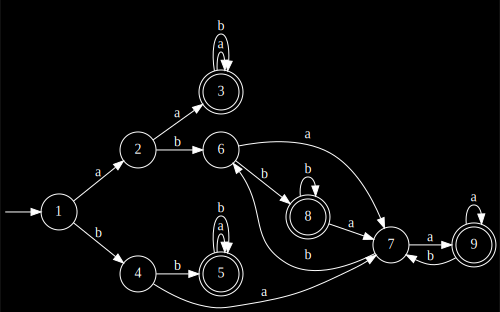

**** **a** **b** aa **ab** **ba** bb aaa aab **aba** abb baa **bab** bba bbb aaaa aaab aaba aabb abaa **abab** **abba** abbb baaa **baab** **baba** babb bbaa bbab bbba bbbb aaaaa aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa **abaab** **ababa** ababb abbaa **abbab** **abbba** abbbb baaaa **baaab** baaba **baabb** babaa **babab** **babba** babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba bbbbb aaaaaa aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa **abaaab** abaaba **abaabb** ababaa **ababab** **ababba** ababbb abbaaa **abbaab** **abbaba** abbabb abbbaa **abbbab** **abbbba** abbbbb baaaaa **baaaab** baaaba **baaabb** baabaa **baabab** **baabba** baabbb babaaa **babaab** **bababa** bababb babbaa **babbab** **babbba** babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba bbbbbb aaaaaaa aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa **abaaaab** abaaaba **abaaabb** abaabaa **abaabab** **abaabba** abaabbb ababaaa **ababaab** **abababa** abababb ababbaa **ababbab** **ababbba** ababbbb abbaaaa **abbaaab** abbaaba **abbaabb** abbabaa **abbabab** **abbabba** abbabbb abbbaaa **abbbaab** **abbbaba** abbbabb abbbbaa **abbbbab** **abbbbba** abbbbbb baaaaaa **baaaaab** baaaaba **baaaabb** baaabaa **baaabab** **baaabba** baaabbb baabaaa **baabaab** baababa **baababb** baabbaa **baabbab** **baabbba** baabbbb babaaaa **babaaab** babaaba **babaabb** bababaa **bababab** **bababba** bababbb babbaaa **babbaab** **babbaba** babbabb babbbaa **babbbab** **babbbba** babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba bbbbbbb

In [20]:
FA['prob5_7'] = (\
  "$(aa+bb)(a+b)^{*}+(a+b)^{*}(aa+bb)$"
, [ [   ' ', 'a', 'b']
  , [  '-1',  2 ,  4 ]
  , [   '2',  3 ,  6 ]
  , [  '+3',  3 ,  3 ]
  , [   '4',  7 ,  5 ]
  , [  '+5',  5 ,  5 ]
  , [   '6',  7 ,  8 ]
  , [   '7',  9 ,  6 ]
  , [  '+8',  7 ,  8 ]
  , [  '+9',  9 ,  7 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_7')

---
**Problem 8:** Build an FA that accepts only those words that have an even number of substrings *ab*.

**Answer 8: ???**
- RE: $\quad (abab)^{*}$
- RE: $\quad (aa^{*}bb^{*}aa^{*}bb^{*})^{*}$

<IPython.core.display.Latex object>

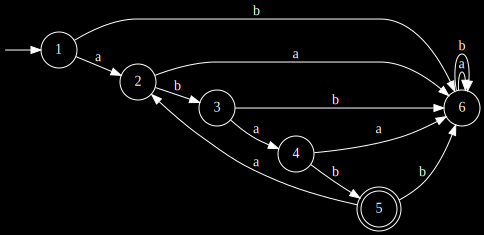

**** **a** **b** **aa** **ab** **ba** **bb** **aaa** **aab** **aba** **abb** **baa** **bab** **bba** **bbb** **aaaa** **aaab** **aaba** **aabb** **abaa** abab **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** **bbbb** **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** **bbbbbb** **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [21]:
FA['prob5_8_1'] = (\
  "$(abab)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  6 ]
  , [  '2',  6 ,  3 ]
  , [  '3',  4 ,  6 ]
  , [  '4',  6 ,  5 ]
  , [ '+5',  2 ,  6 ]
  , [  '6',  6 ,  6 ]])
#-------------------------------------------------------------------------------
display_problem('prob5_8_1')

<IPython.core.display.Latex object>

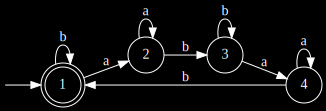

 **a** b **aa** **ab** **ba** bb **aaa** **aab** **aba** **abb** **baa** **bab** **bba** bbb **aaaa** **aaab** **aaba** **aabb** **abaa** abab **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** bbbb **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** aabab **aabba** **aabbb** **abaaa** abaab **ababa** ababb **abbaa** abbab **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** babab **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** bbbbb **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** aaabab **aaabba** **aaabbb** **aabaaa** aabaab **aababa** aababb **aabbaa** aabbab **aabbba** **aabbbb** **abaaaa** abaaab **abaaba** abaabb **ababaa** **ababab** **ababba** ababbb **abbaaa** abbaab **abbaba** abbabb **abbbaa** abbbab **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** baabab **baabba** **baabbb** **babaaa** babaab **bababa** bababb **babbaa** babbab **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** bbabab **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** bbbbbb **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** aaaabab **aaaabba** **aaaabbb** **aaabaaa** aaabaab **aaababa** aaababb **aaabbaa** aaabbab **aaabbba** **aaabbbb** **aabaaaa** aabaaab **aabaaba** aabaabb **aababaa** **aababab** **aababba** aababbb **aabbaaa** aabbaab **aabbaba** aabbabb **aabbbaa** aabbbab **aabbbba** **aabbbbb** **abaaaaa** abaaaab **abaaaba** abaaabb **abaabaa** **abaabab** **abaabba** abaabbb **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** ababbbb **abbaaaa** abbaaab **abbaaba** abbaabb **abbabaa** **abbabab** **abbabba** abbabbb **abbbaaa** abbbaab **abbbaba** abbbabb **abbbbaa** abbbbab **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** baaabab **baaabba** **baaabbb** **baabaaa** baabaab **baababa** baababb **baabbaa** baabbab **baabbba** **baabbbb** **babaaaa** babaaab **babaaba** babaabb **bababaa** **bababab** **bababba** bababbb **babbaaa** babbaab **babbaba** babbabb **babbbaa** babbbab **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** bbaabab **bbaabba** **bbaabbb** **bbabaaa** bbabaab **bbababa** bbababb **bbabbaa** bbabbab **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** bbbabab **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** bbbbbbb

In [22]:
FA['prob5_8_2'] = (\
  "$(aa^{*}bb^{*}aa^{*}bb^{*})^{*}$"
, [ [   ' ', 'a', 'b']
  , [ '-+1',  2 ,  1 ]
  , [   '2',  2 ,  3 ]
  , [   '3',  4 ,  3 ]
  , [   '4',  4 ,  1 ]
  ])
#-------------------------------------------------------------------------------
display_problem('prob5_8_2')

---
**Problem 9:**
* (i) Recall from Chapter 4 the language of all words over the alphabet {*a b*} that have both the letter *a* and the letter *b* in them, but not necessarily in that order. Build an FA that accepts this language.
* (ii) Build an FA that accepts the language of all words with only *a*'s or only *b*'s in them. Give a regular expression for this language.

**Answer 9:**
- (i) RE: $(a+b)^{*}(ab+ba)(a+b)^{*}$ or $\quad (aa^{*}b+bb^{*}a)(a+b)^{*}$
- (ii) RE: $aa^{*}+bb^{*}$


<IPython.core.display.Latex object>

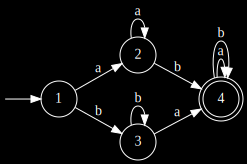

**** **a** **b** **aa** ab ba **bb** **aaa** aab aba abb baa bab bba **bbb** **aaaa** aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba **bbbb** **aaaaa** aaaab aaaba aaabb aabaa aabab aabba aabbb abaaa abaab ababa ababb abbaa abbab abbba abbbb baaaa baaab baaba baabb babaa babab babba babbb bbaaa bbaab bbaba bbabb bbbaa bbbab bbbba **bbbbb** **aaaaaa** aaaaab aaaaba aaaabb aaabaa aaabab aaabba aaabbb aabaaa aabaab aababa aababb aabbaa aabbab aabbba aabbbb abaaaa abaaab abaaba abaabb ababaa ababab ababba ababbb abbaaa abbaab abbaba abbabb abbbaa abbbab abbbba abbbbb baaaaa baaaab baaaba baaabb baabaa baabab baabba baabbb babaaa babaab bababa bababb babbaa babbab babbba babbbb bbaaaa bbaaab bbaaba bbaabb bbabaa bbabab bbabba bbabbb bbbaaa bbbaab bbbaba bbbabb bbbbaa bbbbab bbbbba **bbbbbb** **aaaaaaa** aaaaaab aaaaaba aaaaabb aaaabaa aaaabab aaaabba aaaabbb aaabaaa aaabaab aaababa aaababb aaabbaa aaabbab aaabbba aaabbbb aabaaaa aabaaab aabaaba aabaabb aababaa aababab aababba aababbb aabbaaa aabbaab aabbaba aabbabb aabbbaa aabbbab aabbbba aabbbbb abaaaaa abaaaab abaaaba abaaabb abaabaa abaabab abaabba abaabbb ababaaa ababaab abababa abababb ababbaa ababbab ababbba ababbbb abbaaaa abbaaab abbaaba abbaabb abbabaa abbabab abbabba abbabbb abbbaaa abbbaab abbbaba abbbabb abbbbaa abbbbab abbbbba abbbbbb baaaaaa baaaaab baaaaba baaaabb baaabaa baaabab baaabba baaabbb baabaaa baabaab baababa baababb baabbaa baabbab baabbba baabbbb babaaaa babaaab babaaba babaabb bababaa bababab bababba bababbb babbaaa babbaab babbaba babbabb babbbaa babbbab babbbba babbbbb bbaaaaa bbaaaab bbaaaba bbaaabb bbaabaa bbaabab bbaabba bbaabbb bbabaaa bbabaab bbababa bbababb bbabbaa bbabbab bbabbba bbabbbb bbbaaaa bbbaaab bbbaaba bbbaabb bbbabaa bbbabab bbbabba bbbabbb bbbbaaa bbbbaab bbbbaba bbbbabb bbbbbaa bbbbbab bbbbbba **bbbbbbb**

In [23]:
FA['prob5_9_1'] = (\
  "$(a+b)^{*}(ab+ba)(a+b)^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  3 ]
  , [  '2',  2 ,  4 ]
  , [  '3',  4 ,  3 ]
  , [ '+4',  4 ,  4 ]])
#-------------------------------------------------------------------------------
display_problem('prob5_9_1')

<IPython.core.display.Latex object>

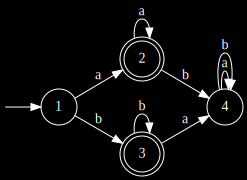

**** a b aa **ab** **ba** bb aaa **aab** **aba** **abb** **baa** **bab** **bba** bbb aaaa **aaab** **aaba** **aabb** **abaa** **abab** **abba** **abbb** **baaa** **baab** **baba** **babb** **bbaa** **bbab** **bbba** bbbb aaaaa **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** bbbbb aaaaaa **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** bbbbbb aaaaaaa **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** bbbbbbb

In [24]:
FA['prob5_9_2'] = (\
  "$aa^{*}+bb^{*}$"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  3 ]
  , [ '+2',  2 ,  4 ]
  , [ '+3',  4 ,  3 ]
  , [  '4',  4 ,  4 ]])
#-------------------------------------------------------------------------------
display_problem('prob5_9_2')

---
**Problem 10:**

**Answer 10:**

---
**Problem 11:** Show that there are exactly 5832 different finite automata with three states *x* *y*, *z* over the alphabet {*a b*}, where *x* is always the start state.

**Answer 11:**

---
**Problem 12:**

**Answer 12:**

---
**Problem 13:**

**Answer 13:**

---
**Problem 14:**

**Answer 14:**

---
**Problem 15:** Build a machine that accepts all strings that have an even length that is not divisible by 6.

**Answer 15:**

<IPython.core.display.Latex object>

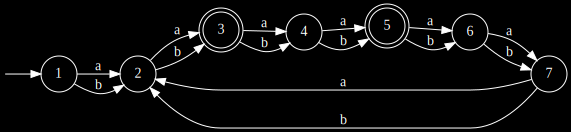

**** **a** **b** aa ab ba bb **aaa** **aab** **aba** **abb** **baa** **bab** **bba** **bbb** aaaa aaab aaba aabb abaa abab abba abbb baaa baab baba babb bbaa bbab bbba bbbb **aaaaa** **aaaab** **aaaba** **aaabb** **aabaa** **aabab** **aabba** **aabbb** **abaaa** **abaab** **ababa** **ababb** **abbaa** **abbab** **abbba** **abbbb** **baaaa** **baaab** **baaba** **baabb** **babaa** **babab** **babba** **babbb** **bbaaa** **bbaab** **bbaba** **bbabb** **bbbaa** **bbbab** **bbbba** **bbbbb** **aaaaaa** **aaaaab** **aaaaba** **aaaabb** **aaabaa** **aaabab** **aaabba** **aaabbb** **aabaaa** **aabaab** **aababa** **aababb** **aabbaa** **aabbab** **aabbba** **aabbbb** **abaaaa** **abaaab** **abaaba** **abaabb** **ababaa** **ababab** **ababba** **ababbb** **abbaaa** **abbaab** **abbaba** **abbabb** **abbbaa** **abbbab** **abbbba** **abbbbb** **baaaaa** **baaaab** **baaaba** **baaabb** **baabaa** **baabab** **baabba** **baabbb** **babaaa** **babaab** **bababa** **bababb** **babbaa** **babbab** **babbba** **babbbb** **bbaaaa** **bbaaab** **bbaaba** **bbaabb** **bbabaa** **bbabab** **bbabba** **bbabbb** **bbbaaa** **bbbaab** **bbbaba** **bbbabb** **bbbbaa** **bbbbab** **bbbbba** **bbbbbb** **aaaaaaa** **aaaaaab** **aaaaaba** **aaaaabb** **aaaabaa** **aaaabab** **aaaabba** **aaaabbb** **aaabaaa** **aaabaab** **aaababa** **aaababb** **aaabbaa** **aaabbab** **aaabbba** **aaabbbb** **aabaaaa** **aabaaab** **aabaaba** **aabaabb** **aababaa** **aababab** **aababba** **aababbb** **aabbaaa** **aabbaab** **aabbaba** **aabbabb** **aabbbaa** **aabbbab** **aabbbba** **aabbbbb** **abaaaaa** **abaaaab** **abaaaba** **abaaabb** **abaabaa** **abaabab** **abaabba** **abaabbb** **ababaaa** **ababaab** **abababa** **abababb** **ababbaa** **ababbab** **ababbba** **ababbbb** **abbaaaa** **abbaaab** **abbaaba** **abbaabb** **abbabaa** **abbabab** **abbabba** **abbabbb** **abbbaaa** **abbbaab** **abbbaba** **abbbabb** **abbbbaa** **abbbbab** **abbbbba** **abbbbbb** **baaaaaa** **baaaaab** **baaaaba** **baaaabb** **baaabaa** **baaabab** **baaabba** **baaabbb** **baabaaa** **baabaab** **baababa** **baababb** **baabbaa** **baabbab** **baabbba** **baabbbb** **babaaaa** **babaaab** **babaaba** **babaabb** **bababaa** **bababab** **bababba** **bababbb** **babbaaa** **babbaab** **babbaba** **babbabb** **babbbaa** **babbbab** **babbbba** **babbbbb** **bbaaaaa** **bbaaaab** **bbaaaba** **bbaaabb** **bbaabaa** **bbaabab** **bbaabba** **bbaabbb** **bbabaaa** **bbabaab** **bbababa** **bbababb** **bbabbaa** **bbabbab** **bbabbba** **bbabbbb** **bbbaaaa** **bbbaaab** **bbbaaba** **bbbaabb** **bbbabaa** **bbbabab** **bbbabba** **bbbabbb** **bbbbaaa** **bbbbaab** **bbbbaba** **bbbbabb** **bbbbbaa** **bbbbbab** **bbbbbba** **bbbbbbb**

In [25]:
FA['prob5_15'] = (\
  "?"
, [ [  ' ', 'a', 'b']
  , [ '-1',  2 ,  2 ]
  , [  '2',  3 ,  3 ]
  , [ '+3',  4 ,  4 ]
  , [  '4',  5 ,  5 ]
  , [ '+5',  6 ,  6 ]
  , [  '6',  7 ,  7 ]
  , [  '7',  2 ,  2 ]])
#-------------------------------------------------------------------------------
display_problem('prob5_15')

---
**Problem 16:** Build an FA such that when the labels *a* and *b* are swapped the new machine is different from the old one but equivalent (the language defined by these machines is the same).

**Answer 16:**

---
**Problem 17:**

**Answer 17:**
- $(aa+ab+ba+bb)a$
- $(a+b)(aa+ab+ba+bb)a$
- $(aa+ba)(aa+ba)^{*}$

---
**Problem 18:**

**Answer 18:**

---
**Problem 19:**

**Answer 19:**

---
**Problem 20:**

**Answer 20:**